## Mid-Course Milestone : Guidelines and Submission
For this milestone, you’ll demonstrate the full data analysis process - from raw data to insight. Your notebook should show your steps, not just the final results. That means starting with messy or unstructured data and documenting how you cleaned and wrangled it using the tools you've learned.

Your repository must include:

X At least one dataset (CSV, Excel, etc.).
-Stretch goal: Add a second dataset or API and combine them in a meaningful way. This is optional for the mini project but will be required for the full capstone, so it’s worth trying here if you can.
X Demonstrated data cleaning and wrangling
X Show your use of Pandas tools to inspect, clean, and restructure your data. Don’t start with a pre-cleaned file- your process is the focus.
X Exploratory data analysis (EDA)
X Include summary statistics, reshaped tables, and grouped insights. Handle missing values and fix data types as needed.
X At least three meaningful visualizations
X Use Matplotlib, Seaborn, or Plotly to clearly communicate insights. Include at least one chart that highlights a comparison, pattern, or key finding.
X For each visual, include a markdown cell that explains what story you are trying to tell, and justify your choices of chart, color, shape, etc.
X Explanatory markdown throughout
X Describe your thinking as you go: why you cleaned data a certain way, what you hoped to find, what the visualizations show, etc.
X Use of a virtual environment and requirements.txt file
Follow the setup instructions in this week's first lesson.
Your repo must include:

Your completed notebook
The data file(s) used (uploaded into the repo, not just linked externally)
Your requirements.txt file
a README.md file (see previous lesson)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

## Load the dataset 
-  Renamed the original csv to something more easy to use

In [ ]:
# Read in the csv file
data = pd.read_csv('../data/kentucky_shelter_data.csv')

# Make a copy of the data to work with
df = data.copy()

# Preview and Analyze the data structure

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.dtypes

## Data Clean Up
- Rename Columns
- Check for Missing Data
- Count of Missing Data
- Replace necessary missing data
- Drop columns not needed for analysis
- Drop rows missing critical info
- Check for duplicates
- Drop Duplicates
- Convert date columns to datetime format

In [ ]:
# Rename columns to clearer names for use
df.columns = ["kennelId", "animalId", "jurisdiction", "intakeReason", "intakeSubtype", 
              "intakeDate", "surrenderReason", "outcome", "outcomeSubType", "outcomeDate",
              "animalType", "sex", "bites", "petSize", "color", "breed", "zipCode", "objectId"]


In [ ]:
# check for missing data
df.isna()

In [ ]:
# count of missing data
df.isna().sum()

In [ ]:
# check for duplicates
df.duplicated(keep = False)

In [ ]:
# cuunt of duplicated data
df.duplicated(keep = False).sum()

In [27]:
# Convert date columns to datetime so we can do date calculations
df['indate'] = pd.to_datetime(df['intakeDate'], errors='coerce')
df['outdate'] = pd.to_datetime(df['outcomeDate'], errors='coerce')

print(df.indate, df.outdate)

0       2021-01-17
1       2021-01-18
2       2021-01-21
3       2021-02-03
4       2021-02-10
           ...    
60338   2023-08-11
60339   2023-08-15
60340   2023-08-18
60341   2023-08-19
60342   2024-06-28
Name: indate, Length: 60343, dtype: datetime64[ns] 0       2021-02-06
1       2021-01-18
2       2021-01-23
3       2021-02-04
4       2021-02-11
           ...    
60338   2023-10-03
60339   2023-09-18
60340          NaT
60341   2023-08-29
60342   2024-07-03
Name: outdate, Length: 60343, dtype: datetime64[ns]


In [ ]:
# Drop columns not needed for analysis
df = df.drop(columns=["kennelId", "jurisdiction", "zipCode", "objectId"])

In [ ]:
# validate columns were droppped
df.columns

In [ ]:
# Fill missing data with simple placeholder text
# This avoids potential issues due to blanks
df['intakeSubtype'] = df['intakeSubtype'].fillna("unknown")
df['surrenderReason'] = df['surrenderReason'].fillna("none")
df['sex'] = df['sex'].fillna("unspecified")
df['bites'] = df['bites'].fillna("unspecified")
df['petSize'] = df['petSize'].fillna("unspecified")
df['color'] = df['color'].fillna("unspecified")
df['breed'] = df['breed'].fillna("unknown")
df['animalType'] = df['animalType'].fillna('unknown')
df['outcome'] = df['outcome'].fillna('unknown')

In [ ]:
# count of missing data after filling in some columns
# missing data in outdate and outcome indicates animal remains in shelter
df.isna().sum()

In [28]:
# Count number of animals by type and outcome
outcome_table = df.pivot_table(index='animalType', columns='outcome', aggfunc='size', fill_value=0)

print(outcome_table)

outcome     ADOPTION  DIED  DISPOSAL  EUTH  FOSTER  FOUND EXP  LOST  RELEASE  \
animalType                                                                     
BIRD              60     7         9     6      11          0     1        0   
CAT             5425   355       231  1135    4150          0     8       12   
DOG             8295    69       379  1708    4531          3    31        3   
GUINEA PIG         2     0         0     1      10          0     0        0   
LIVESTOCK          2     0         7     0       2          0     0        0   
OTHER             32     5        59   130      31          0     1        1   
RABBIT            12     4         3     3     101          0     0        0   

outcome     RTF   RTO   SNR   TNR  TRANSFER  TRANSPORT  
animalType                                              
BIRD          0     4     0     0        25          0  
CAT         918   477  5646  3181      1429          4  
DOG           0  5185     0     1      2466        

##  ** NOTE ** ##
- Unique calculations will be shown immediately before the visualization

## Analysis and Charts included below:
- Intake Total and Category Total by Year
- Average Number of Animals per Year by Intake Reason
- Positive vs Negative Outcome Types Ratio
- Average Outcomes Per Year by Animal Type (Subplots) 
- Days in shelter by Animal Type
- Average Yearly Adoption Rates by Animal Type
- Adoptions by Day of the Week


## Intake Total and Category Total by Year
- I wanted to see the total intake numbers each year from 2021 thru 2025 to see how many animals overall were going thru the Metro Animal Shelter.
- Then I wanted to see the breakdown for each year by reason for the animal being there.  There were 10 categories with some having very small numbers each year so I grouped them into "like" types.

The grouping is as follows:

| Surrender  | Stray      | Other       | Foster      |
  ---------    ---------    -----------   -----------
| OWNER SUR  | STRAY      | CONFISCATE  | FOSTER      |
| RETURN     | LOST       | DISPOSAL    | FOR TRANSP  |
|            | FOUND      | EVACUEE     |             |

- I chose a stacked bar chart because it is best for showing total intakes per year and the composition by reason.  It immediately shows which intake reasons contribute most each year.


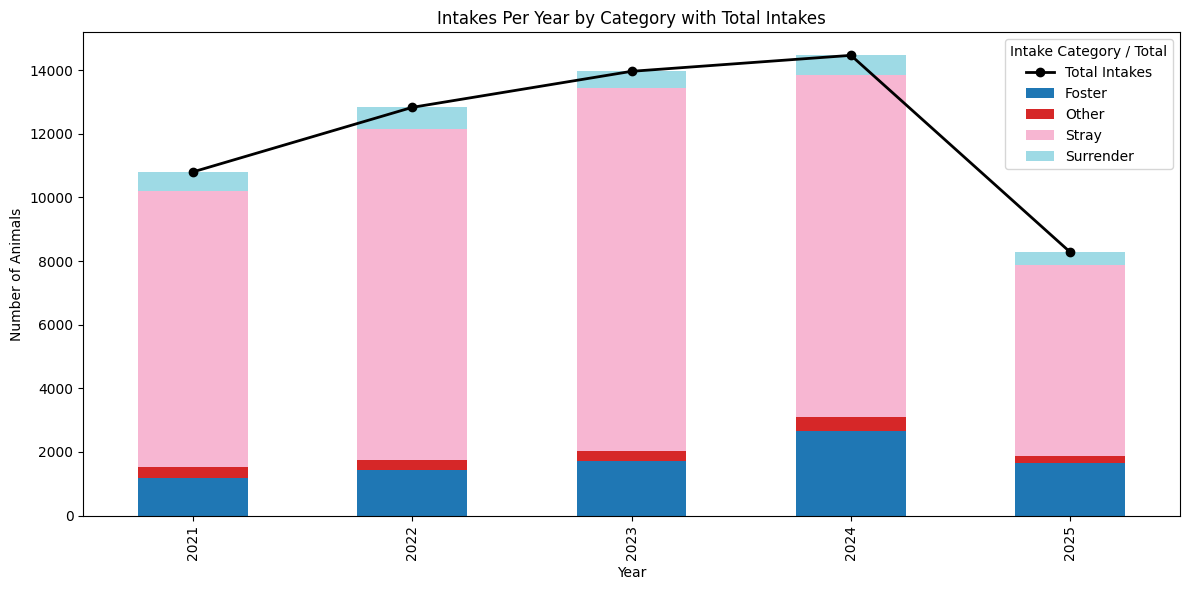

<Figure size 640x480 with 0 Axes>

In [29]:
# Copy and group intake categories
df_grouped = df.copy()
df_grouped['intakeCategory'] = df_grouped['intakeReason'].replace({
    "OWNER SUR": "Surrender",
    "RETURN": "Surrender",
    "LOST": "Stray",
    "STRAY": "Stray",
    "FOUND": "Stray",
    "CONFISCATE": "Other",
    "DISPOSAL": "Other",
    "EVACUEE": "Other",
    "FOSTER": "Foster",
    "FOR TRANSP": "Foster"
})

# Group by year and category
intakes_per_year = df_grouped.groupby([df_grouped['indate'].dt.year, 'intakeCategory']).size().unstack(fill_value=0)

# Total intakes per year
total_intakes = intakes_per_year.sum(axis=1)

# Plot stacked bars
fig, ax = plt.subplots(figsize=(12,6))
intakes_per_year.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Plot total intakes on the same x-axis
# numeric positions for bars
x = np.arange(len(total_intakes))  
ax.plot(x, total_intakes.values, color='black', marker='o', linewidth=2, label='Total Intakes')

# Fix x-ticks to show the year labels
ax.set_xticks(x)
ax.set_xticklabels(intakes_per_year.index)

plt.title("Intakes Per Year by Category with Total Intakes")
plt.xlabel("Year")
plt.ylabel("Number of Animals")
plt.legend(title="Intake Category / Total")
plt.tight_layout()
plt.show()

plt.savefig("../plots/IntakeYearandCategory.png")


##  Average Number of Animals per Year( 2021-2025) by Intake Reason
-  I wanted further know the average number of animals coming in to the animal shelter for each intake reason.  I wanted to know the top reasons.  If it was stray animals that needed to find homes or if owners were surrendering their animals at a high rate since the pandemic. 

- I chose a simple bar chart because it is best for comparing each intake reason side-by-side.
- Very easy to see totals for each intake type and how they rank with one another.


In [30]:
# Extract year from intake date
df['intakeYear'] = df['indate'].dt.year

# Count animals per intake reason per year
intake_per_year = df.groupby(['intakeYear', 'intakeReason']).size().reset_index(name='count')

# Calculate average per year for each intake reason
avg_intake_per_year = intake_per_year.groupby('intakeReason')['count'].mean().reset_index()

# Round to whole numbers for readability
avg_intake_per_year['count'] = avg_intake_per_year['count'].round().astype(int)

# Rename columns for clarity
avg_intake_per_year.columns = ['intakeReason', 'average_per_year']

# See results
print(avg_intake_per_year)

  intakeReason  average_per_year
0   CONFISCATE               242
1     DISPOSAL                85
2      EVACUEE                 2
3   FOR TRANSP                 2
4       FOSTER              1730
5        FOUND               846
6         LOST              1816
7    OWNER SUR               320
8       RETURN               243
9        STRAY              6784


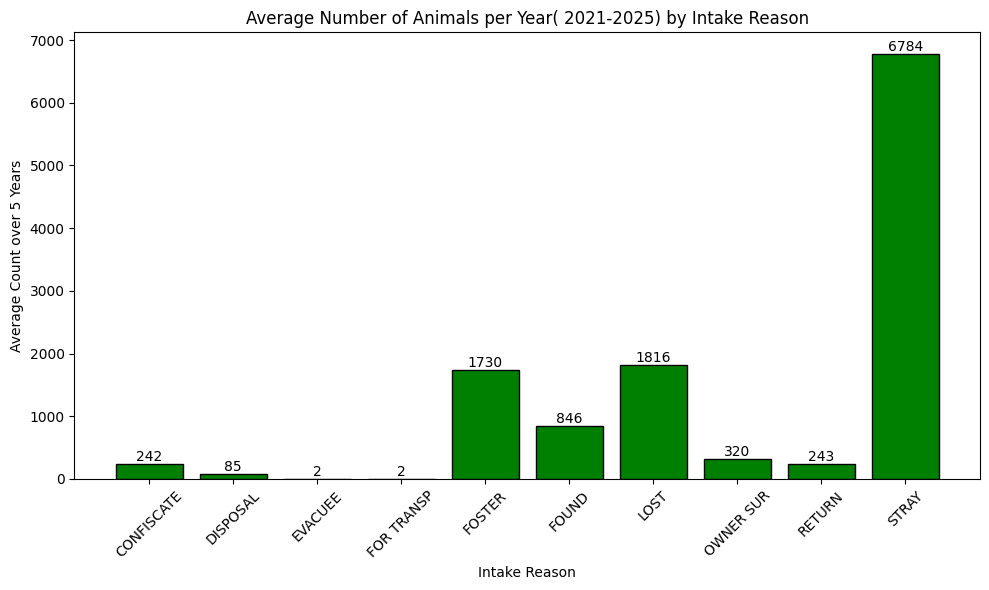

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(10,6))
bars = plt.bar(avg_intake_per_year['intakeReason'], avg_intake_per_year['average_per_year'], color='green', edgecolor='black')

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center', va='bottom')

plt.title("Average Number of Animals per Year( 2021-2025) by Intake Reason")
plt.xlabel("Intake Reason")
plt.ylabel("Average Count over 5 Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig("../plots/avganimalbyintakereason.png")

## Positive vs Negative Outcome Types Ratio
- I wanted to see averaged outcomes positive vs negative overall.
- I needed to group the list of outcomes by what I considered positive, negative or unknown.
- My grouping is below

| Positive   | Negative   | Unknown     |
  ---------    ---------    -----------   
| ADOPTION   | EUTH       | TNR         |
| RTO        | DIED       | SNR         |
| FOSTER     | DISPOSAL   | TRANSFER    |
| TRANSPORT  |            |             |

- The positive were based on the animal being in a permanent / foster home or being transported to a rescue where it would not be killed.
- A negative outcome was based on the outcome resulting in death of the animal.
- Unknown was based on an outcome could not be determined after the animal left the shelter.

- I chose a Pie chart because it is best for showing simple comparisons among a small number of categories.
- It highlights the largest and smallest categories very easily.

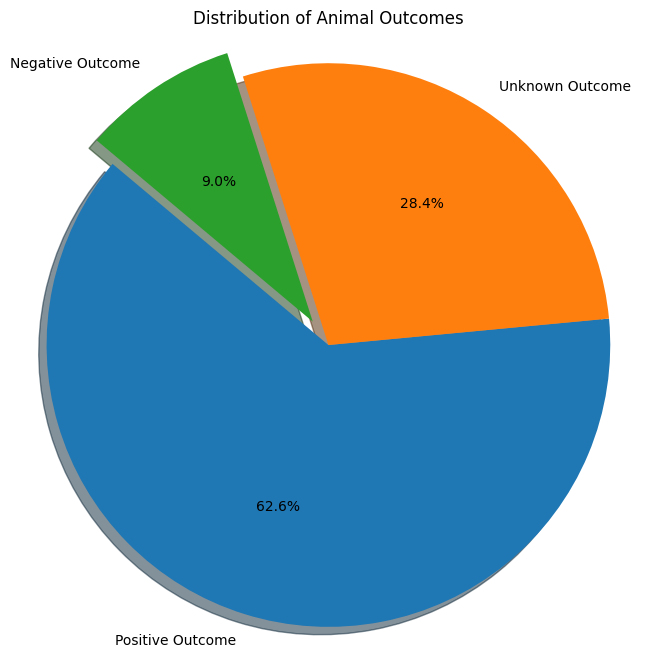

<Figure size 640x480 with 0 Axes>

In [32]:
# Count positive outcomes which is a grouping of several outtake reasons per month
adoptions_df = df[df['outcome'].isin(["ADOPTION", "RTO", "FOSTER", "TRANSPORT"])]    
adoptions_per_month = adoptions_df.groupby(adoptions_df['outdate'].dt.to_period("M")).size().reset_index(name="count")
adoptions_per_month['outdate'] = adoptions_per_month['outdate'].dt.to_timestamp()

# Count spay/neuter and release and transfer to KHS per month
unknown_df = df[df['outcome'].isin(["TNR", "SNR", "TRANSFER"])]  
unknown_per_month = unknown_df.groupby(unknown_df['outdate'].dt.to_period("M")).size().reset_index(name="count")
unknown_per_month['outdate'] = unknown_per_month['outdate'].dt.to_timestamp()

# Count negative outcome per month
euth_df = df[df['outcome'].isin(["EUTH", "DIED", "DISPOSAL"])]  
euth_per_month = euth_df.groupby(euth_df['outdate'].dt.to_period("M")).size().reset_index(name="count")
euth_per_month['outdate'] = euth_per_month['outdate'].dt.to_timestamp()


# Total counts for each category
positive_count = adoptions_df.shape[0]   # All adoption-type outcomes
unknown_count = unknown_df.shape[0]      # All TNR/SNR/TRANSFER
negative_count = euth_df.shape[0]        # All EUTH/DIED/DISPOSAL

# Labels and values
labels = ['Positive Outcome', 'Unknown Outcome', 'Negative Outcome']
counts = [positive_count, unknown_count, negative_count]

# Optional: explode negative slice to emphasize it
explode = [0, 0, 0.1]  # only explode the negative outcomes

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title("Distribution of Animal Outcomes")
plt.axis('equal')  # Equal aspect ratio makes it circular
plt.show()


plt.savefig("../plots/outcomeposnegpie.png")

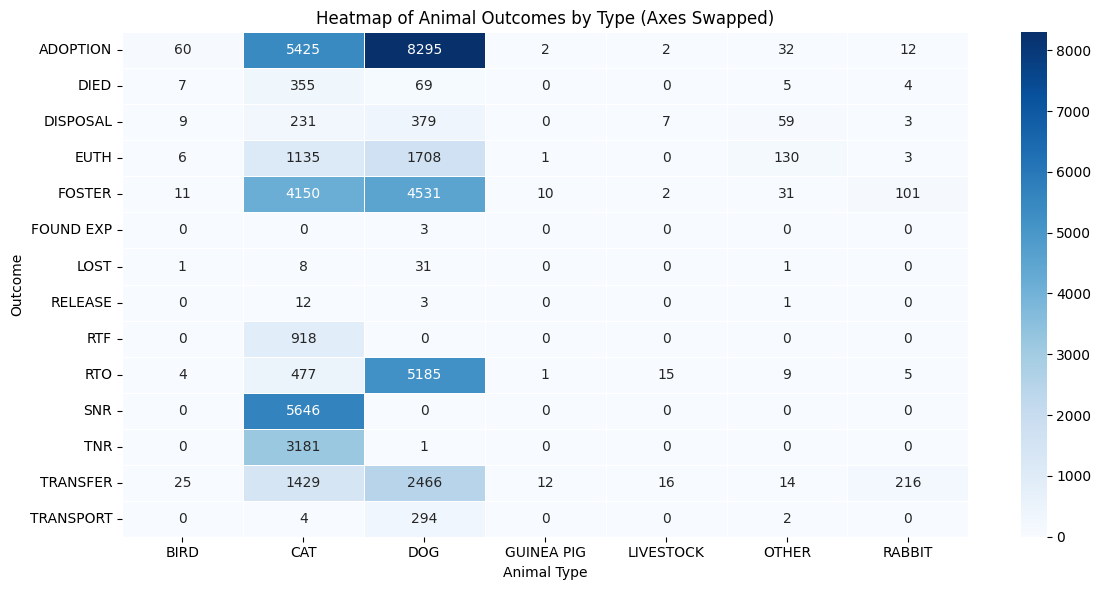

<Figure size 640x480 with 0 Axes>

In [33]:
# Create pivot table: rows = outcomes, columns = animal types
heatmap_table = df.pivot_table(index='outcome', columns='animalType', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_table,
            annot=True,        # show numbers on each cell
            fmt="d",           # display numbers as integers
            cmap="Blues",      # color scheme
            linewidths=0.5,
            cbar=True)

# Add title and labels
plt.title("Heatmap of Animal Outcomes by Type (Axes Swapped)")
plt.xlabel("Animal Type")
plt.ylabel("Outcome")

plt.tight_layout()
plt.show()

plt.savefig("../plots/outcomeheatmap.png")

## Average Outcomes Per Year by Animal Type (Faceted Subplots)
- Each subplot shows the average number of outcomes per year for one animal type.

- When I attempted to put all this data together in a chart it was very overcrowded and extremely difficult to read.  I decided to give each animal their own chart.

- I chose a bar chart because it is best for comparing totals side-by-side.
- And it is very simple and easy read.

In [34]:
# Extract year from outcome date
df['year'] = df['outdate'].dt.year

# Count outcomes per year per animal type
outcome_counts_per_year = df.groupby(['animalType', 'year', 'outcome']).size().reset_index(name='count')

# Calculate average per year for each animal type and outcome
avg_outcome_per_year = outcome_counts_per_year.groupby(['animalType', 'outcome'])['count'].mean().reset_index()

# Round to whole numbers for readability
avg_outcome_per_year['count'] = avg_outcome_per_year['count'].round().astype(int)

# Get list of animal types
animal_types = avg_outcome_per_year['animalType'].unique()

print(animal_types, avg_outcome_per_year)

['BIRD' 'CAT' 'DOG' 'GUINEA PIG' 'LIVESTOCK' 'OTHER' 'RABBIT']     animalType    outcome  count
0         BIRD   ADOPTION     12
1         BIRD       DIED      2
2         BIRD   DISPOSAL      2
3         BIRD       EUTH      1
4         BIRD     FOSTER      3
5         BIRD       LOST      1
6         BIRD        RTO      2
7         BIRD   TRANSFER      6
8          CAT   ADOPTION   1085
9          CAT       DIED     71
10         CAT   DISPOSAL     46
11         CAT       EUTH    227
12         CAT     FOSTER    830
13         CAT       LOST      2
14         CAT    RELEASE     12
15         CAT        RTF    184
16         CAT        RTO     95
17         CAT        SNR   1129
18         CAT        TNR    636
19         CAT   TRANSFER    286
20         CAT  TRANSPORT      1
21         DOG   ADOPTION   1659
22         DOG       DIED     14
23         DOG   DISPOSAL     76
24         DOG       EUTH    341
25         DOG     FOSTER    906
26         DOG  FOUND EXP      3
27         DO

/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_56681/1400891092.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['outcome'], rotation=45)
/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_56681/1400891092.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['outcome'], rotation=45)
/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_56681/1400891092.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset['outcome'], rotation=45)
/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_56681/1400891092.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocato

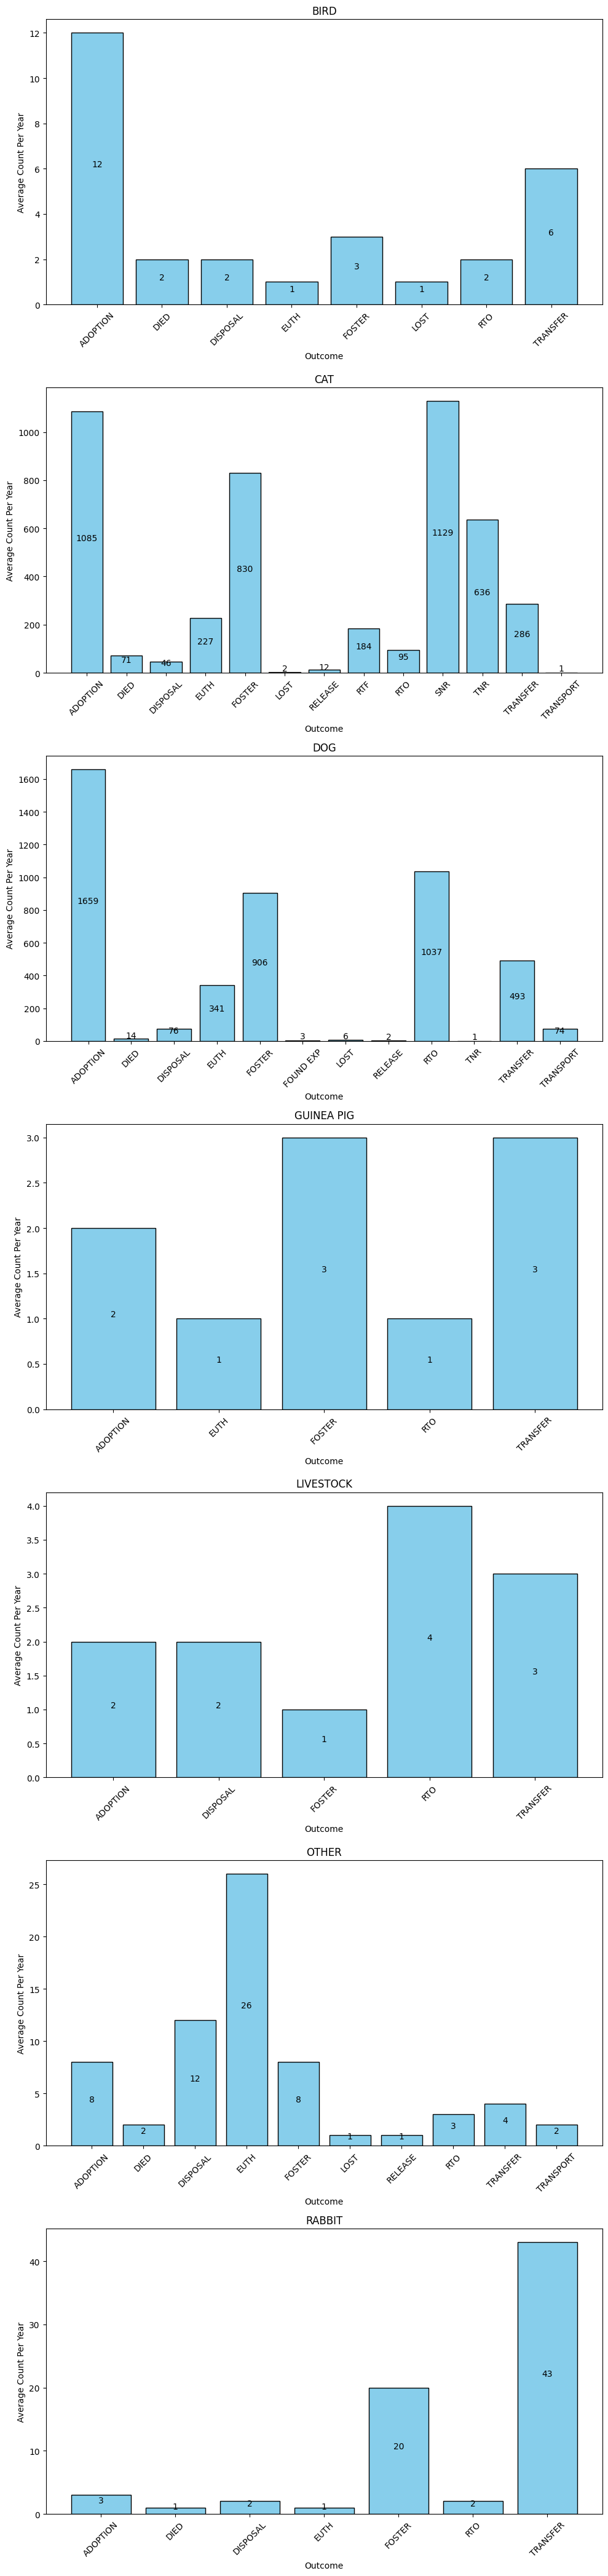

<Figure size 640x480 with 0 Axes>

In [35]:
# Setup subplot grid
n = len(animal_types)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 6*n))

# Loop through each animal type and plot on its subplot
for i, animal in enumerate(animal_types):
    subset = avg_outcome_per_year[avg_outcome_per_year['animalType'] == animal]
    ax = axes[i] if n > 1 else axes  # handle single subplot case
    
    bars = ax.bar(subset['outcome'], subset['count'], color='skyblue', edgecolor='black')
    
    # Add numbers on top of each bar (moved inside loop after several attempts outside)
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,  
            height/2,                     
            str(int(height)),                 
            ha='center', va='bottom'
        )

    ax.set_title(f"{animal}")
    ax.set_xlabel("Outcome")
    ax.set_ylabel("Average Count Per Year")
    ax.set_xticklabels(subset['outcome'], rotation=45) 
    
plt.tight_layout()
plt.show()

plt.savefig("../plots/outcomesubplots.png")

## Days in shelter by Animal Type

- I wanted know how long each animal stayed in the shelter before an outcome.  And compare it to the other types of animals. 

- I chose a bar chart because it is best for comparing each animal type's length of stay side-by-side.
- Very easy to see totals and how they rank with one another.

In [36]:
# Subtract intake date from outcome date to get a timedelta, then convert to days
df['days_in_shelter'] = (df['outdate'] - df['indate']).dt.days

# Preview the new column
print(df[['animalType', 'indate', 'outdate', 'days_in_shelter']].head())

# Filter out any negative or missing days (if intake/outcome dates are missing)
df_shelter = df[df['days_in_shelter'] >= 0]

# Calculate the average days in shelter for each animal type
avg_days = df.groupby('animalType')['days_in_shelter'].mean().reset_index()

print(avg_days)


  animalType     indate    outdate  days_in_shelter
0        DOG 2021-01-17 2021-02-06             20.0
1        DOG 2021-01-18 2021-01-18              0.0
2        DOG 2021-01-21 2021-01-23              2.0
3        CAT 2021-02-03 2021-02-04              1.0
4        CAT 2021-02-10 2021-02-11              1.0
   animalType  days_in_shelter
0        BIRD        13.338583
1         CAT         6.730473
2         DOG        11.509419
3  GUINEA PIG         2.576923
4   LIVESTOCK        55.707317
5       OTHER         3.161404
6      RABBIT         5.014535


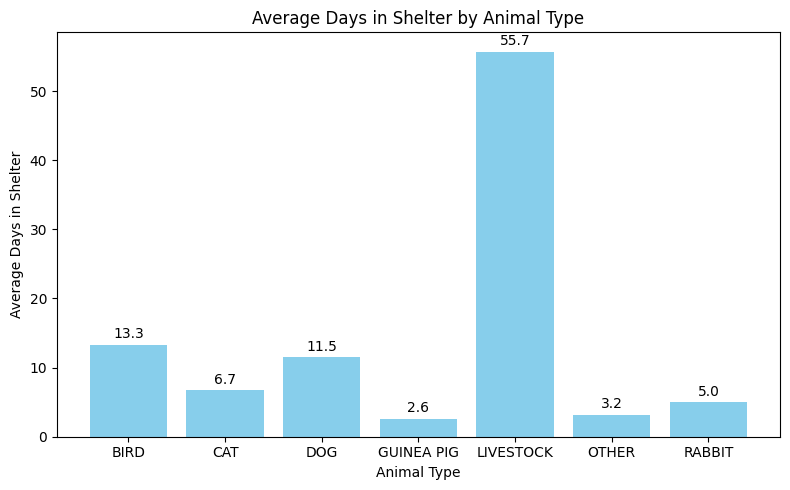

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(8,5))
bars = plt.bar(avg_days['animalType'], avg_days['days_in_shelter'], color='skyblue')

# Add title and labels
plt.title("Average Days in Shelter by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Average Days in Shelter")

# Add exact numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.savefig("../plots/avgdaysinshelter.png")


## Average Yearly Adoption Rates by Animal Type
- I was very interested to see how many adoptions on average occurred each year for each animal type.  And which type was highest.  I thought it was either be cats or dogs with the low intake numbers of the other animal types.  I was hoping cats were adotped more but I assumed it would show dogs snce their intake numbers were higher.

- I chose a bar chart because it is best for comparing adoption counts side-by-side.
- Very easy to see totals and how they rank against one another.

In [38]:
# Filter for adopted animals
adoptions = df[df['outcome'] == "ADOPTION"].copy()

# Extract year from outcome date
adoptions['year'] = adoptions['outdate'].dt.year

# Count adoptions per animal type per year
adoptions_per_year = adoptions.groupby(['animalType', 'year']).size().reset_index(name='count')

# Calculate average adoptions per year for each animal type
avg_adoptions_per_year = adoptions_per_year.groupby('animalType')['count'].mean().reset_index()

# Round averages to whole numbers
avg_adoptions_per_year['count'] = avg_adoptions_per_year['count'].round().astype(int)

# Rename columns for clarity
avg_adoptions_per_year.columns = ['animalType', 'average_adoptions_per_year']

# Preview the result
print(avg_adoptions_per_year)


   animalType  average_adoptions_per_year
0        BIRD                          12
1         CAT                        1085
2         DOG                        1659
3  GUINEA PIG                           2
4   LIVESTOCK                           2
5       OTHER                           8
6      RABBIT                           3


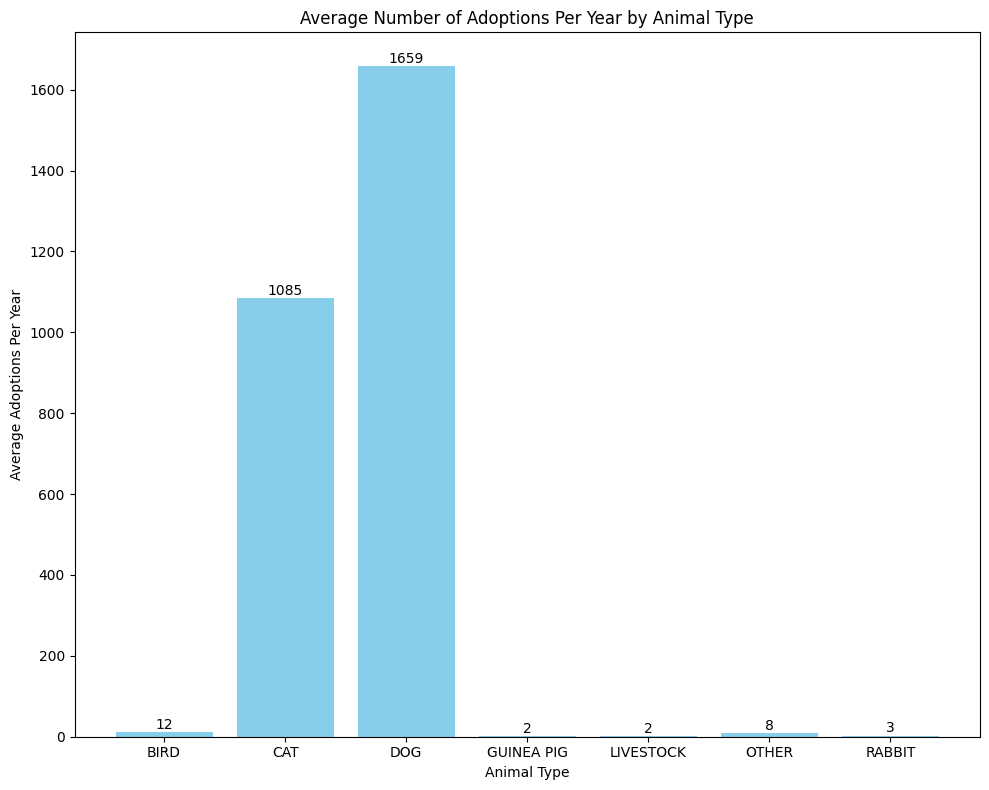

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(10,8))
bars = plt.bar(avg_adoptions_per_year['animalType'], avg_adoptions_per_year['average_adoptions_per_year'], color='skyblue')

plt.title("Average Number of Adoptions Per Year by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Average Adoptions Per Year")

# Add whole numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.savefig("../plots/adoptionratebyanimalyearly.png")


## Adoptions by Day of the Week
- I wanted to show what days of the week adoptions were the highest. This would be useful when coordinating volunteers and having events to showcase the animals.
- Additionally, this shows the days that might benefit from new ideas and efforts to get more traction to the shelter.

- I chose a bar chart because it is best for comparing each animal type's length of stay side-by-side.
- Very easy to see totals and how they rank with one another.

In [40]:
# Filter only adoption outcomes
adoptions = df[df['outcome'] == "ADOPTION"]

# Create a new column for the day of the week 
adoptions['day_of_week'] = adoptions['outdate'].dt.day_name()

# Count adoptions by day
adoptions_by_day = adoptions['day_of_week'].value_counts()

# Make sure days are in correct order
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
adoptions_by_day = adoptions_by_day.reindex(days_order)

# DataFrame version to see it tabular
adoptions_by_day_data = adoptions['day_of_week'].value_counts().reindex(
    days_order
).reset_index()

adoptions_by_day_data.columns = ['day_of_week', 'count']

print(adoptions_by_day_data)

  day_of_week  count
0      Monday   1306
1     Tuesday   1779
2   Wednesday   1731
3    Thursday   1800
4      Friday   2457
5    Saturday   3154
6      Sunday   1601


/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_56681/2925810512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adoptions['day_of_week'] = adoptions['outdate'].dt.day_name()


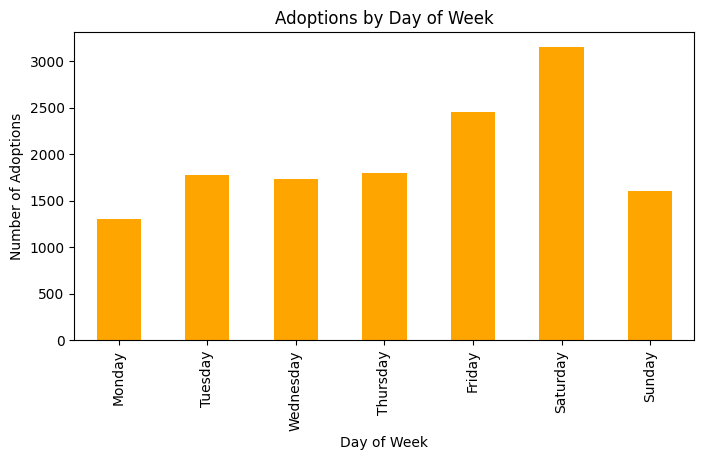

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot
plt.figure(figsize=(8,4))
adoptions_by_day.plot(kind='bar', color='orange')
plt.title("Adoptions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Adoptions")
plt.show()

plt.savefig("../plots/adoptionsbydayofweek.png")

##  Quick Observations 
- Dogs and cats dominate intakes and adoptions.
- The most frequent outcomes are adoptions and return to owner for dogs & adoptions and foster for cats.
- Stray and owner surrendered animals are the top intake reasons.
- Adoptions peak on weekends with Saturday having the highest numbers.
- Dogs and Cats leave the shelter rather quickly, other types of animals especially livestock tend to have longer stays.
